# Importing necessery libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\project2\\Raw-Data.csv")

In [3]:
data.head()

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes
1,Italy,10-19,Female,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing","Pains,Nasal-Congestion,Runny-Nose",Moderate,No
2,Iran,20-24,Transgender,"Fever,Tiredness,Dry-Cough","Pains,Nasal-Congestion",Severe,Dont-Know
3,Republic of Korean,25-59,NaN,"Fever,Tiredness",Pains,None,NaN
4,France,60+,NaN,Fever,"Nasal-Congestion,Runny-Nose,Diarrhea",NaN,NaN


# checking the shape of the data

In [4]:
data.shape

(16, 7)

In [5]:
data.dtypes

Country                  object
Age                      object
Gender                   object
Symptoms                 object
Experiencing_Symptoms    object
Severity                 object
Contact                  object
dtype: object

# checking the Null values

In [6]:
data.isnull()

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True
4,False,False,True,False,False,True,True
5,False,True,True,False,False,True,True
6,False,True,True,False,False,True,True
7,False,True,True,False,False,True,True
8,False,True,True,False,False,True,True
9,False,True,True,False,False,True,True


In [7]:
data.isnull().sum()

Country                   6
Age                      11
Gender                   13
Symptoms                  0
Experiencing_Symptoms     5
Severity                 12
Contact                  13
dtype: int64

In [8]:
data.describe()

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
count,10,5,3,16,11,4,3
unique,10,5,3,16,11,4,3
top,Germany,0-9,Transgender,"Tiredness,Dry-Cough",Runny-Nose,Severe,Yes
freq,1,1,1,1,1,1,1


# Removing the Null values

In [9]:
country = len(data.Country.dropna().unique())
age = len(data.Age.dropna().unique())
gender = len(data.Gender.dropna().unique())
symptoms = len(data.Symptoms.dropna().unique())
esymptoms = len(data.Experiencing_Symptoms.dropna().unique())
severity = len(data.Severity.dropna().unique())
contact = len(data.Contact.dropna().unique())


In [10]:
print("Total Combination Possible: ",country * age * gender * symptoms * esymptoms * severity * contact)

Total Combination Possible:  316800


# Converting the data elements of array into list

In [11]:
import itertools
columns = [data.Country.dropna().unique().tolist(),
          data.Age.dropna().unique().tolist(),
          data.Gender.dropna().unique().tolist(),
          data.Symptoms.dropna().unique().tolist(),
          data.Experiencing_Symptoms.dropna().unique().tolist(),
          data.Severity.dropna().unique().tolist(),
          data.Contact.dropna().unique().tolist()]

# Finding the cartesian product

In [12]:

End_data = pd.DataFrame(list(itertools.product(*columns)), columns=data.columns)

In [13]:
End_data.shape

(316800, 7)

In [14]:
End_data.head()

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes
1,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,No
2,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Dont-Know
3,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,Yes
4,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,No


# Spiting the symptom columns

In [15]:
symptoms_list = End_data['Symptoms'].str.split(',')

from collections import Counter
symptoms_counter = Counter(([a for b in symptoms_list.tolist() for a in b]))

for symptom in symptoms_counter.keys():
    End_data[symptom] = 0
    End_data.loc[End_data['Symptoms'].str.contains(symptom), symptom] = 1



In [16]:
End_data.head()

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes,1,1,1,1,1,0
1,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,No,1,1,1,1,1,0
2,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Dont-Know,1,1,1,1,1,0
3,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,Yes,1,1,1,1,1,0
4,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,No,1,1,1,1,1,0


# splitting the esymptom columns

In [17]:
esymptoms_list = End_data['Experiencing_Symptoms'].str.split(',')

from collections import Counter
esymptoms_counter = Counter(([a for b in esymptoms_list.tolist() for a in b]))

for esymptom in esymptoms_counter.keys():
    End_data[esymptom] = 0
    End_data.loc[End_data['Experiencing_Symptoms'].str.contains(esymptom), esymptom] = 1



In [18]:
End_data.head()

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes,1,1,1,1,1,0,1,1,1,1,0
1,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,No,1,1,1,1,1,0,1,1,1,1,0
2,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Dont-Know,1,1,1,1,1,0,1,1,1,1,0
3,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,Yes,1,1,1,1,1,0,1,1,1,1,0
4,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,No,1,1,1,1,1,0,1,1,1,1,0


# Droping specific columns

In [19]:
End_data = End_data.drop(['Symptoms','Experiencing_Symptoms'],axis=1)
dummies = pd.get_dummies(End_data.drop('Country',axis=1))
dummies['Country'] = End_data['Country']
End_data = dummies

In [20]:
End_data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [21]:
End_data.dtypes

Fever                       int64
Tiredness                   int64
Dry-Cough                   int64
Difficulty-in-Breathing     int64
Sore-Throat                 int64
None_Sympton                int64
Pains                       int64
Nasal-Congestion            int64
Runny-Nose                  int64
Diarrhea                    int64
None_Experiencing           int64
Age_0-9                     uint8
Age_10-19                   uint8
Age_20-24                   uint8
Age_25-59                   uint8
Age_60+                     uint8
Gender_Female               uint8
Gender_Male                 uint8
Gender_Transgender          uint8
Severity_Mild               uint8
Severity_Moderate           uint8
Severity_None               uint8
Severity_Severe             uint8
Contact_Dont-Know           uint8
Contact_No                  uint8
Contact_Yes                 uint8
Country                    object
dtype: object

# Inserting new dataset

In [22]:
End_data2=pd.read_csv('C:\\Users\\DELL\\Desktop\\project2\\cleaned-Data.csv')
data.head(10)

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes
1,Italy,10-19,Female,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing","Pains,Nasal-Congestion,Runny-Nose",Moderate,No
2,Iran,20-24,Transgender,"Fever,Tiredness,Dry-Cough","Pains,Nasal-Congestion",Severe,Dont-Know
3,Republic of Korean,25-59,NaN,"Fever,Tiredness",Pains,None,NaN
4,France,60+,NaN,Fever,"Nasal-Congestion,Runny-Nose,Diarrhea",NaN,NaN
5,Spain,NaN,NaN,"Tiredness,Dry-Cough,Difficulty-in-Breathing,So...","Nasal-Congestion,Runny-Nose",NaN,NaN
6,Germany,NaN,NaN,"Tiredness,Dry-Cough,Difficulty-in-Breathing",Nasal-Congestion,NaN,NaN
7,UAE,NaN,NaN,"Tiredness,Dry-Cough","Runny-Nose,Diarrhea",NaN,NaN
8,Other-EUR,NaN,NaN,Tiredness,Runny-Nose,NaN,NaN
9,Other,NaN,NaN,"Dry-Cough,Difficulty-in-Breathing,Sore-Throat",Diarrhea,NaN,NaN


In [23]:
End_data2.dtypes

Fever                       int64
Tiredness                   int64
Dry-Cough                   int64
Difficulty-in-Breathing     int64
Sore-Throat                 int64
None_Sympton                int64
Pains                       int64
Nasal-Congestion            int64
Runny-Nose                  int64
Diarrhea                    int64
None_Experiencing           int64
Age_0-9                     int64
Age_10-19                   int64
Age_20-24                   int64
Age_25-59                   int64
Age_60+                     int64
Gender_Female               int64
Gender_Male                 int64
Gender_Transgender          int64
Severity_Mild               int64
Severity_Moderate           int64
Severity_None               int64
Severity_Severe             int64
Contact_Dont-Know           int64
Contact_No                  int64
Contact_Yes                 int64
Country                    object
dtype: object

In [24]:
End_data2.groupby(['Severity_Severe'])
End_data2

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


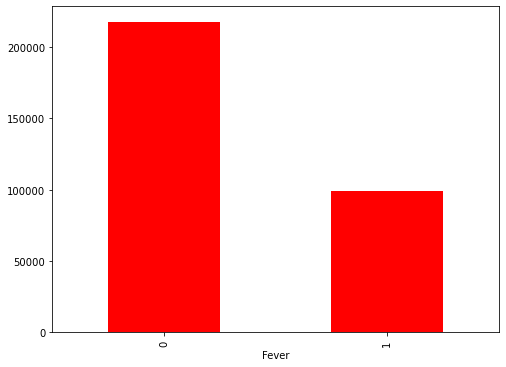

In [25]:
plt.figure(figsize=(8,6))
End_data2.groupby('Fever').size().plot(color='red',kind='bar')
plt.show()

<Figure size 1080x720 with 0 Axes>

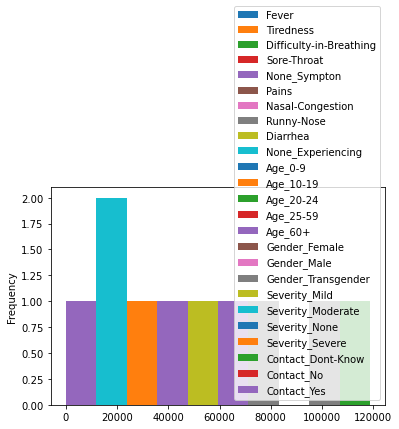

In [27]:
plt.figure(figsize=(15,10))
End_data2.groupby('Dry-Cough').sum().plot(kind='hist')
plt.show()